# **Team 18: Parking Violations**

Dataset: `team18_parking.csv`

---

## **Importing Packages and Reading Data**

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [215]:
df = pd.read_csv(r"C:\Users\AdamD\OneDrive\Personal Documents\team18_parking.csv")

## **Data Exploration**

In [216]:
df.head()

,violation_id,date,violation_type,zone,time_of_day,fine_amount,paid,vehicle_type,repeat_offender,day_of_week
0,1,2023-07-12,Handicap,Residential,Morning,50.0,True,Car,False,Sunday
1,2,2023-11-22,No Parking Zone,Commercial,Afternoon,25.0,True,Truck,False,Wednesday
2,3,2023-05-21,Handicap,Commercial,Morning,50.0,True,Car,True,Friday
3,4,2023-09-25,No Parking Zone,Residential,Morning,100.0,True,Car,True,Tuesday
4,5,2023-04-14,Expired Meter,Downtown,Afternoon,75.0,False,Car,False,Thursday


> - This function gives us the first five rows of the dataset, and also the column headings including the index column.
> - The use case for this is that we get to see a small snapshot of the data before further exploration and analysis.
> - The most important information from this are the values of the columns. We can observe what type of data is stored in each column, and assume it is roughly the same type of data for all other records.

In [217]:
df.shape

(950, 10)

> - The shape attribute returns the number of rows and columns in the dataset.
> - It does so by returning a tuple (rows, columns).
> - The insight gained from this is that the parking violations dataset contains 950 records of data, and 10 different attributes.

In [218]:
df.columns

Index(['violation_id', 'date', 'violation_type', 'zone', 'time_of_day',
       'fine_amount', 'paid', 'vehicle_type', 'repeat_offender',
       'day_of_week'],
      dtype='object')

> - The columns attribute returns all 10 columns of the dataset in a list type output.
> - We can use this information to observe what each of the names are for the columns.

In [219]:
df.dtypes

violation_id         int64
date                object
violation_type      object
zone                object
time_of_day         object
fine_amount        float64
paid                  bool
vehicle_type        object
repeat_offender       bool
day_of_week         object
dtype: object

> - The dtype attribute returns all the columns and the types of data stored in each.
> - NOTE: the object data type is string in Python Pandas.
> - An issue that can be observed is that the date and day_of_week columns are of string type.
> - They really should be changed to datetime data type.

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   violation_id     950 non-null    int64  
 1   date             950 non-null    object 
 2   violation_type   950 non-null    object 
 3   zone             950 non-null    object 
 4   time_of_day      950 non-null    object 
 5   fine_amount      900 non-null    float64
 6   paid             950 non-null    bool   
 7   vehicle_type     911 non-null    object 
 8   repeat_offender  950 non-null    bool   
 9   day_of_week      950 non-null    object 
dtypes: bool(2), float64(1), int64(1), object(6)
memory usage: 61.4+ KB


> - The info method is one of the more important methods to use when exploring data since it prints many characteristics of the data all at once in a single chart.
> - It shows all 10 columns similar to the output of the column attribute.
> - It also prints the number of values in each column that are not Null (also known as NaN) values. 
> - This is important because you can take the number of rows found with the shape attribute (950) and subtract it by each non-null count and find how many null values are in each column.
> - for example, the date column has 950 non-null values, and 950 rows - 950 non-nulls = 0, meaning the are no null values found in the date column.
> - but, for the fine_amount, there are only 900 non-null values, which means 50 rows contain null.
> - The last section of the output is the type of data found in each column.

In [221]:
df.describe()

,violation_id,fine_amount
count,950.000000,900.000000
mean,475.500000,58.638889
std,274.385677,32.244678
min,1.000000,25.000000
25%,238.250000,25.000000
50%,475.500000,50.000000
75%,712.750000,75.000000
max,950.000000,150.000000


> - The describe method returns descriptive statistics for only metric (integer, float, datetime, etc.) columns.
> - There are only two columns that the descriptive statistics can be calculated for, which are the violation_id and the fine_amount.
> - For the violation_id, these statistics can be ignored since the column is used as an index.
> - The fine_amount column stats are very important. It tells us the quartiles, mean, standard deviation, and counts of all non-null fines.

In [222]:
df.isna().sum()

violation_id        0
date                0
violation_type      0
zone                0
time_of_day         0
fine_amount        50
paid                0
vehicle_type       39
repeat_offender     0
day_of_week         0
dtype: int64

> - This tells us what the counts are for NaN values in each column.
> - The two columns that contain NaN values are fine_amount at 50, and vehicle_type at 39.
> - These null values must be dealt with.

In [223]:
df.duplicated().sum()

np.int64(0)

> - This tells us the total number of rows that are the exact same in the dataset.
> - The good news is that there are no duplicate rows that must be removed.
> - If there were, then these rows may skew the mean and distort our analysis. They would need to be romoved permanently.

Findings:

> - There are 10 columns in the dataset, which are 'violation_id', 'date', 'violation_type', 'zone', 'time_of_day', 'fine_amount', 'paid', 'vehicle_type', 'repeat_offender', and'day_of_week'.
> - The number of rows of data is 950.
> - The values in the date column are not of datetime data type, and the values for the day_of_week column are also not of datetime data type.
> - The columns with NaN values are fine_amount and vehicle_type.
> - There are also no duplicate rows in the dataset.

---

## **Data Cleaning**

### **Removing NaN Values:**

In [224]:
df['fine_amount'].isna().value_counts(normalize= True)

fine_amount
False    0.947368
True     0.052632
Name: proportion, dtype: float64

> - The first column we choose to remove the NaN values from is the fine_amount column.
> - We first need to determine if we can remove or replace the NaN values safely.
> - The NaN values make up 5.27% of the column, which tells us we can safely remove or replace them. The values should be around 5%.

In [225]:
meanFine = df['fine_amount'].mean()
meanFine

np.float64(58.638888888888886)

In [226]:
df['fine_amount'] = df['fine_amount'].fillna(meanFine)

> - The method we chose to use is to fill in the NaN values with the average of the fine amounts.
> - The average is $58.64, and each NaN value is replaced with by this amount.
> - The only issue to this approach is that standard deviation and variance do decrease, but mean will stay as is.

In [227]:
df['vehicle_type'].isna().value_counts(normalize= True)

vehicle_type
False    0.958947
True     0.041053
Name: proportion, dtype: float64

> - The next column with NaN values is vehicle_type with 4.11% of the rows missing.

In [228]:
df['vehicle_type'].value_counts()

vehicle_type
Car           532
Truck         194
SUV           149
Motorcycle     36
Name: count, dtype: int64

In [229]:
df['vehicle_type'] = df['vehicle_type'].fillna('Car')

> - The method we chose to use is replacing all NaN values with the vehicle type Car.
> - The reason for this is that car is the most common vehicle datatype with a total of 532 records containing car.

### **Incorrect Data Types:**

In [230]:
df['date'] = pd.to_datetime(df['date'])

> - The date column is of string type and needs to be changed to datetime data type.

In [231]:
df['day_of_week_Number'] = df['day_of_week'].map(
    {
        'Sunday': 1,
        'Monday': 2,
        'Tuesday': 3,
        'Wednesday': 4,
        'Thursday': 5,
        'Friday': 6,
        'Saturday': 7
    }
)

df.head()

,violation_id,date,violation_type,zone,time_of_day,fine_amount,paid,vehicle_type,repeat_offender,day_of_week,day_of_week_Number
0,1,2023-07-12,Handicap,Residential,Morning,50.0,True,Car,False,Sunday,1
1,2,2023-11-22,No Parking Zone,Commercial,Afternoon,25.0,True,Truck,False,Wednesday,4
2,3,2023-05-21,Handicap,Commercial,Morning,50.0,True,Car,True,Friday,6
3,4,2023-09-25,No Parking Zone,Residential,Morning,100.0,True,Car,True,Tuesday,3
4,5,2023-04-14,Expired Meter,Downtown,Afternoon,75.0,False,Car,False,Thursday,5


> - The days of the week have been mapped to thier number.
> - 1 = Saturday, and 7 = Sunday.
> - These values have been added to a new column since we may like to use the names of the week to desplay on charts.
> - Visually, it will look better with the names of the weeks rather than numbers from 1 to 7.

### **Outliers:**

In [232]:
df.describe()

,violation_id,date,fine_amount,day_of_week_Number
count,950.000000,950,950.000000,950.000000
mean,475.500000,2023-07-01 18:44:42.947368448,58.638889,4.027368
min,1.000000,2023-01-01 00:00:00,25.000000,1.000000
25%,238.250000,2023-04-03 00:00:00,25.000000,2.000000
50%,475.500000,2023-06-29 12:00:00,50.000000,4.000000
75%,712.750000,2023-10-02 18:00:00,75.000000,6.000000
max,950.000000,2023-12-31 00:00:00,150.000000,7.000000
std,274.385677,NaN,31.383747,2.073285


> - By using the Minimum and maximum descriptive statistics, we can determine outliers in both directions for each metric column.
> - The column violation_id does not have any outliers since it is used as an index, and the maximum value is equal to the number of rows in the dataset at 950.
> - The date column also does not have any outliers since each date is within the year 2023. The min date is 2023-01-01, and the max is 2023-12-31.
> - The fine amount may contain outliers, but it does not seem like it given the fact that standard deviation is $31.384, the max is $150, and the min is $25.
> - The day_of_week_Number also does not contain any outliers since all values range from 1 to 7.

In [233]:
df['fine_amount'].value_counts().reset_index().sort_values('fine_amount')

,fine_amount,count
1,25.000000,257
0,50.000000,317
4,58.638889,50
2,75.000000,182
3,100.000000,95
5,150.000000,49


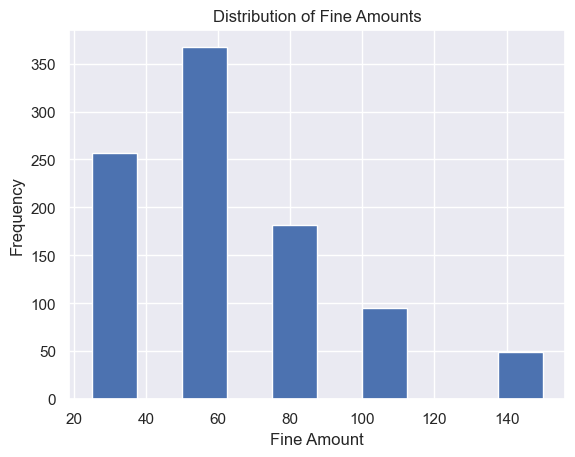

In [234]:
df['fine_amount'].hist()
plt.xlabel("Fine Amount")
plt.ylabel("Frequency")
plt.title("Distribution of Fine Amounts")
plt.show()

In [235]:
print('Kurtosis is: ', df['fine_amount'].kurtosis())
print('Skewness is: ', df['fine_amount'].skew())

Kurtosis is:  1.4019697122565207
Skewness is:  1.192174410641835


> - The only column that could have outliers is fine_amount, but this does not seem to be the case.
> - The maximum fine $150, and the minimum is $25.
> - The standard deviation is $31.40, and the kurtosis is only 1.4.
> - Kurtosis measures how clustered the data is around the mean and how thick the tails are. kurtosis is well within the -2 to +2 range for normal distribution.
> - The only worrying metric is the skewness, which indicates that there is a longer right tail than left. Meaning, the data is not normally distributed.
> - However, when we look at the possible fine amounts, there are only 6 unique fines in the column.
> - 59 people in the dataset received a parking violation fine of $150, and this is the most extreme value.
> - This tells us there are no outliers.

### **Inconsistent/Invalid Data Values:**

In [236]:
df['date'].dt.year.value_counts()

date
2023    950
Name: count, dtype: int64

In [237]:
df['violation_type'].value_counts()

violation_type
Expired Meter      387
No Parking Zone    219
Fire Hydrant       150
Street Cleaning    102
Handicap            92
Name: count, dtype: int64

In [238]:
df['zone'].value_counts()

zone
Commercial     345
Residential    303
Downtown       222
Industrial      80
Name: count, dtype: int64

In [239]:
df['time_of_day'].value_counts()

time_of_day
Afternoon    412
Morning      265
Evening      182
Night         91
Name: count, dtype: int64

In [240]:
df['fine_amount'].value_counts()

fine_amount
50.000000     317
25.000000     257
75.000000     182
100.000000     95
58.638889      50
150.000000     49
Name: count, dtype: int64

In [241]:
df['paid'].value_counts()

paid
True     659
False    291
Name: count, dtype: int64

In [242]:
df['vehicle_type'].value_counts()

vehicle_type
Car           571
Truck         194
SUV           149
Motorcycle     36
Name: count, dtype: int64

In [243]:
df['repeat_offender'].value_counts()

repeat_offender
False    722
True     228
Name: count, dtype: int64

In [244]:
df['day_of_week'].value_counts()

day_of_week
Sunday       154
Friday       151
Saturday     147
Monday       131
Thursday     125
Wednesday    124
Tuesday      118
Name: count, dtype: int64

> - The reason we get the counts for each value found in all columns is to determine if there exists any incorrect or inconsistent one occurance values with a count of 1. If there are, then they should not be there and must be removed.
> - In our dataset, there are no other values that are mispelled, incorrect, negative when should be positive, or any values with a low count of 1 or close to 1.
> - The lowest count value in a cloumn is the vehicle type Motorcycle at 36, but it is meant to be in the dataset.
> - Therefore, there are no inconsistencies across any and all columns.
---

## **Analysis**

Questions:
> 1. Which zone has the most parking violations?
> 2. What is the payment compliance rate by violation type?
> 3. How do fine amounts vary by zone?
> 4. What percentage of violators are repeat offenders?
> 5. Which time of day has the most violations?
> 6. Is there a difference in compliance between weekdays and weekends?

### **1. Which zone has the most parking violations?**

In [245]:
zoneParkingViolations = df['zone'].value_counts().reset_index()
zoneParkingViolations

,zone,count
0,Commercial,345
1,Residential,303
2,Downtown,222
3,Industrial,80


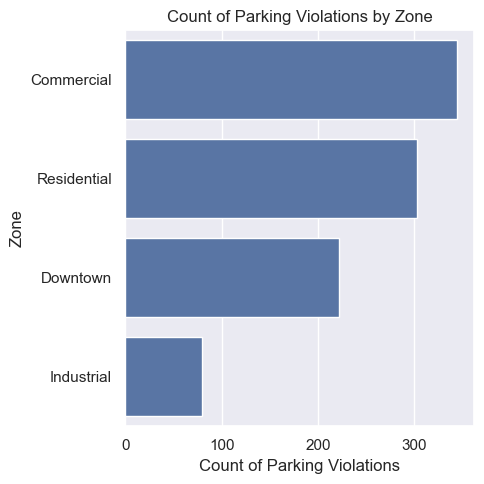

In [246]:
plt.figure(figsize= (5, 5))
sns.set_theme('notebook')

sns.barplot(data= zoneParkingViolations, y= 'zone', x= 'count', orient= 'h')
plt.xlabel('Count of Parking Violations')
plt.ylabel('Zone')
plt.title('Count of Parking Violations by Zone')

plt.tight_layout()
plt.show()

Insights:
> - The zone with the highest number of parking violations is commercial at 345, while the lowest is industrial at 80.
> - These numbers make sense because in industrial zones, there are typically designated parking lots for workers.
> - In commercial zones, people may be forced to park on streets to go into stores that do not have designated parking.
> - This can lead to people parking in no parking zones, or on streets with parking time limits (10am to 12pm for example).
> - Expired meters may be another cause to this increase in numbers.

In [247]:
commercial = df.loc[df['zone'] == 'Commercial', 'violation_type'].value_counts().reset_index()
commercial

,violation_type,count
0,Expired Meter,140
1,No Parking Zone,85
2,Fire Hydrant,47
3,Street Cleaning,37
4,Handicap,36


In [248]:
industrial = df.loc[df['zone'] == 'Industrial', 'violation_type'].value_counts().reset_index()
industrial

,violation_type,count
0,Expired Meter,32
1,Fire Hydrant,22
2,No Parking Zone,14
3,Street Cleaning,7
4,Handicap,5


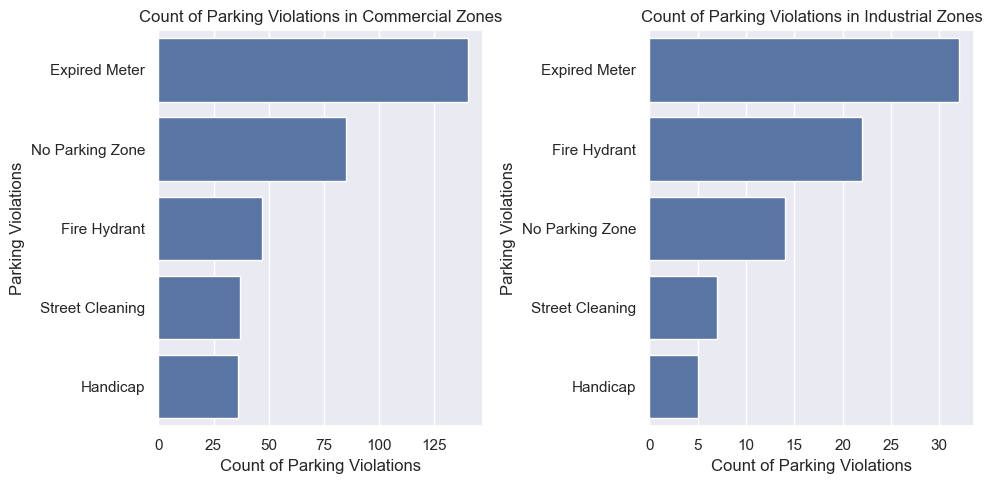

In [249]:
plt.figure(figsize= (10, 5))
sns.set_theme('notebook')

plt.subplot(1, 2, 1)
sns.barplot(data= commercial, y= 'violation_type', x= 'count', orient= 'h')
plt.xlabel('Count of Parking Violations')
plt.ylabel('Parking Violations')
plt.title('Count of Parking Violations in Commercial Zones')

plt.subplot(1, 2, 2)
sns.barplot(data= industrial, y= 'violation_type', x= 'count', orient= 'h')
plt.ylabel('Parking Violations')
plt.xlabel('Count of Parking Violations')
plt.title('Count of Parking Violations in Industrial Zones')

plt.tight_layout()
plt.show()

Insights:
> - As stated above, the assumptions are correct.
> - In commercial zones, most of the violations are due to expired meters and no parking zones.
> - While for industrial, expired parking meters are still the main source of violations, but the second highest are from parking too close to fire hydrants.

### **2. What is the payment compliance rate by violation type?**

In [250]:
truePaid = df.loc[df['paid'] == True, 'violation_type'].value_counts().reset_index()
falsePaid = df.loc[df['paid'] == False, 'violation_type'].value_counts().reset_index()

trueFalsePaid = pd.merge(left= truePaid, right= falsePaid, on= 'violation_type')
trueFalsePaid.rename(columns={'count_x': 'paid', 'count_y': 'notPaid'}, inplace= True)

trueFalsePaid

,violation_type,paid,notPaid
0,Expired Meter,259,128
1,No Parking Zone,161,58
2,Fire Hydrant,106,44
3,Street Cleaning,70,32
4,Handicap,63,29


> - To calculate the compliance rate, we first need the number of those who paid and did not pay per violation type.

In [251]:
trueFalsePaid['TotalPaid_NotPaid'] = trueFalsePaid['notPaid'] + trueFalsePaid['paid']

trueFalsePaid['paidtoTotal'] = trueFalsePaid['paid'] / trueFalsePaid['TotalPaid_NotPaid']
trueFalsePaid['notPaidtoTotal'] = trueFalsePaid['notPaid'] / trueFalsePaid['TotalPaid_NotPaid']

trueFalsePaid.sort_values('paid', ascending= False, inplace= True)
trueFalsePaid

,violation_type,paid,notPaid,TotalPaid_NotPaid,paidtoTotal,notPaidtoTotal
0,Expired Meter,259,128,387,0.669251,0.330749
1,No Parking Zone,161,58,219,0.735160,0.264840
2,Fire Hydrant,106,44,150,0.706667,0.293333
3,Street Cleaning,70,32,102,0.686275,0.313725
4,Handicap,63,29,92,0.684783,0.315217


> - Then, to calculate the compliance rate, we divide the number of paid violations by the total number of violations per violation type.
> - We then do the same thing to calculate the proportion of those who did not pay in order to compare the two metrics.

In [252]:
print('mean of compliance ', trueFalsePaid['paidtoTotal'].mean())
print('mean of non-compliance ', trueFalsePaid['notPaidtoTotal'].mean())

mean of compliance  0.6964268497025342
mean of non-compliance  0.3035731502974659


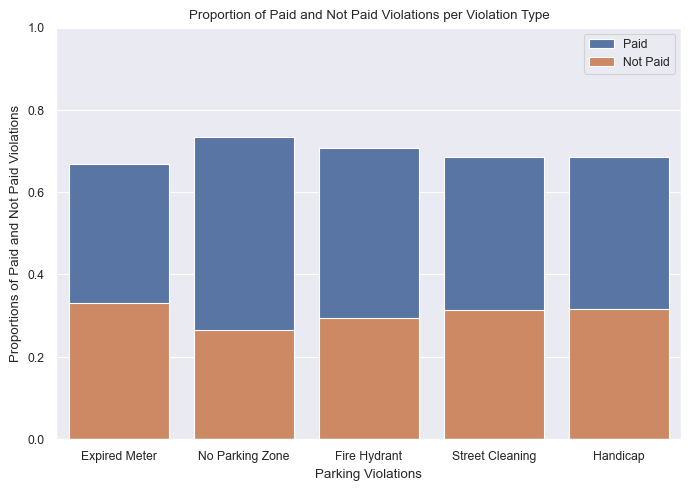

In [253]:
plt.figure(figsize= (7, 5))
sns.set_theme('paper')

sns.barplot(data= trueFalsePaid, y= 'paidtoTotal', x= 'violation_type', label= 'Paid')
sns.barplot(data= trueFalsePaid, y= 'notPaidtoTotal', x= 'violation_type', label= 'Not Paid')
plt.xlabel('Parking Violations')
plt.ylabel('Proportions of Paid and Not Paid Violations')
plt.title('Proportion of Paid and Not Paid Violations per Violation Type')
plt.ylim(0, 1.0)

plt.tight_layout()
plt.show()

Insights:
> - Compliance rate refers to the proportion of violations that have been paid.
> - In the analysis, we grouped compliance rate by each violation type, and determined what proportion of people paid (compliance rate) and did not paid for their ticketed violations.
> - The violation with the highest proportion of those who paid is the no parking zone violation, with 73.5% paying the fine, and 26.5% not paying.
> - The violation with the lowest compliance rate is Epired Meter violations at only 67% paid and 33% unpaid.
> - The good news is, on average for each violation type, around 70% pay and 30% do not pay.

### **3. How do fine amounts vary by zone?**

In [254]:
fineByZone = df[['zone', 'fine_amount']].sort_values('zone')
fineByZone

,zone,fine_amount
949,Commercial,58.638889
284,Commercial,75.000000
282,Commercial,50.000000
631,Commercial,58.638889
279,Commercial,25.000000
...,...,...
661,Residential,25.000000
660,Residential,50.000000
659,Residential,50.000000
656,Residential,150.000000


> - The first step is to all the fine amounts by each of the zones.

In [255]:
distribution = fineByZone.groupby('zone')['fine_amount'].describe().reset_index()
distribution

,zone,count,mean,std,min,25%,50%,75%,max
0,Commercial,345.0,58.109501,31.585019,25.0,25.0,50.0,75.0,150.0
1,Downtown,222.0,59.658158,30.494705,25.0,50.0,50.0,75.0,150.0
2,Industrial,80.0,56.982986,31.305692,25.0,25.0,50.0,75.0,150.0
3,Residential,303.0,58.932068,31.936316,25.0,25.0,50.0,75.0,150.0


> - Then, we group the fine amounts by zone and compute descriptive statistics.
> - We could have just gotten the mean of each zone, but it is better to compare accross all descriptive statistics statistic.

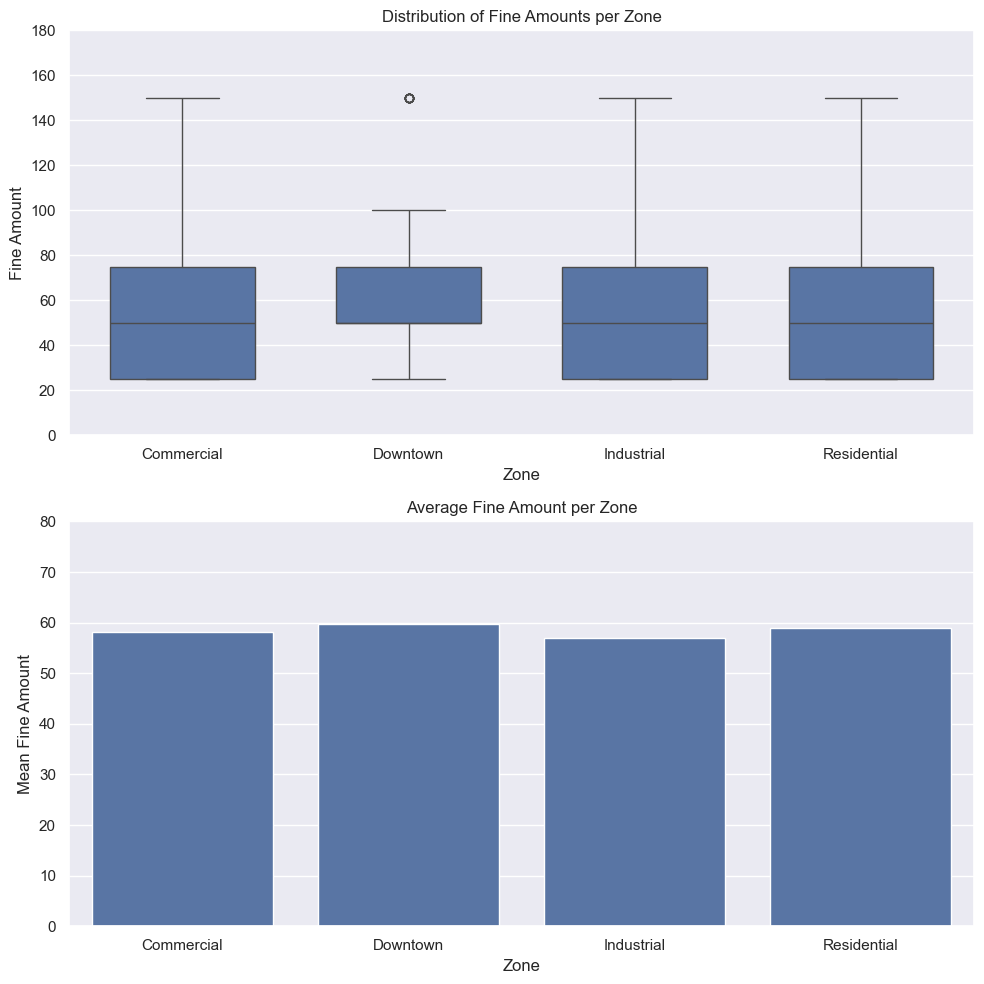

In [256]:
plt.figure(figsize= (10, 10))
sns.set_theme('notebook')

plt.subplot(2, 1, 1)
sns.boxplot(data= fineByZone, y= 'fine_amount', x= 'zone', gap= 0.2)
plt.xlabel('Zone')
plt.ylabel('Fine Amount')
plt.title('Distribution of Fine Amounts per Zone')
plt.ylim(0, 180)

plt.subplot(2, 1, 2)
sns.barplot(data= distribution, x= 'zone', y= 'mean')
plt.title('Average Fine Amount per Zone')
plt.xlabel('Zone')
plt.ylabel('Mean Fine Amount')
plt.ylim(0, 80)

plt.tight_layout()
plt.show()

Insights:
> - The box plots for each zone visually show the descriptive statistics calculated using the describe method.
> - The bar plots used only show the difference in means for fine amounts per zone, which is the most important metric used.

> - Given the graphs and the charts, we can conclude that fine amounts do vary per zone on many key distribution statistics.
> - As shown in the box plot diagram, the three zones of commercial, industrial, and residential all have the same minimum, 25%, 50%, 75% quartiles, and maximum fine amounts.
> - Min = 25.0, 25% quartile = 25.0, 50% quartile = 50.0, 75% quartile = 75.0, and maximum = 150.0.
> - However, for the downtown zones, this is where the distribution changes.
> - For the downtown zone, the min = 25.0, 25% = 50.0, 50% = 50.0, 75% = 75.0, and max = 150.0, but the maximum value actually acts as an outlier.

> - The mean fine amounts also very per zone as seen in the average fine amount bor plots.
> - The zone with the highest mean is downtown at $59.66, and the lowest is industrial at $57.
> - The reason for this is that most of the violations occur in the downtown zone at a count of 345.
> - In addition, the standard deviation for commercial is higher at $31.585019 than industrial at $31.305692, which means there is a higher frequency of greater valued violatons in commercial zones than in industrial zones.

### **4. What percentage of violators are repeat offenders?**

In [257]:
repeat = df['repeat_offender'].value_counts(normalize= True).reset_index()
repeat

,repeat_offender,proportion
0,False,0.76
1,True,0.24


> - To get these repeat and non-repeat offender proportions, we get all the boolean values (true, false) in the repeat_offender column, count the values, and then normalize them.
> - Normalization divides the counts of the values by the total number of values.
> - For false, it appears 722 times. 722 / 950 (the total number of rows) = 76%.

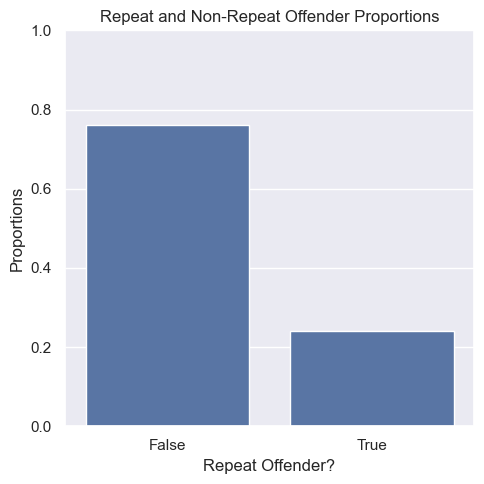

In [258]:
plt.figure(figsize= (5, 5))
sns.set_theme('notebook')

sns.barplot(data= repeat, x= 'repeat_offender', y= 'proportion')
plt.title('Repeat and Non-Repeat Offender Proportions')
plt.xlabel('Repeat Offender?')
plt.ylabel('Proportions')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

Insights:
> - The proportion of repeat offenders is 24%, and for non-repeat offenders it is 76%.
> - This tells us that people do not typically repeat the same actions which get them a parking violation.
> - They learn from their mistakes and are less likely to get another violation again.

### **5. Which time of day has the most violations?**

In [259]:
violationsTime = df['time_of_day'].value_counts().reset_index()
violationsTime

,time_of_day,count
0,Afternoon,412
1,Morning,265
2,Evening,182
3,Night,91


> - To answer this quesion, we first get the counts of all the times of days.
> - We can see that most of the violations occur in the afternoon at 412 violations.
> - Very little violations occur at night, with only 91 occurances.

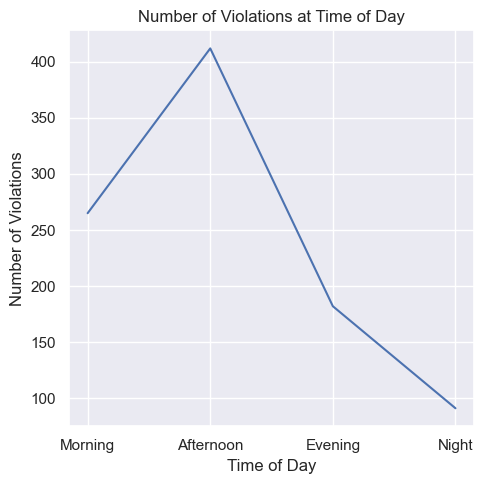

In [260]:
violationsTime['order'] = violationsTime['time_of_day'].map({'Morning': 1, 'Afternoon': 2, 'Evening': 3, 'Night': 4})
violationsTime.sort_values('order', inplace= True)

plt.figure(figsize= (5, 5))
sns.set_theme('notebook')

sns.lineplot(data= violationsTime, x= 'time_of_day', y= 'count')
plt.title('Number of Violations at Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Violations')

plt.tight_layout()
plt.show()

Insights:
> - The time of day with the highest number of parking violations is the afternoon, with 412 violations.
> - The lowest is at night at 91, while in the morning it is 245, and in the evening there are 182 violations.
> - This data displayed in the time series line chart above makes sense because the zone with the highest number of violations are commercial zones.
> - Stores will be operation in the morning and afternoons, causing a peak in parking violations.
> - While at night, stores are closed which makes the number of violations during the evening and night decline.

### **6. Is there a difference in compliance between weekdays and weekends?**

In [261]:
complianceByDay = df.groupby(['day_of_week_Number', 'day_of_week'])['paid'].mean().reset_index().sort_values('day_of_week_Number')
complianceByDay

,day_of_week_Number,day_of_week,paid
0,1,Sunday,0.727273
1,2,Monday,0.687023
2,3,Tuesday,0.703390
3,4,Wednesday,0.653226
4,5,Thursday,0.664000
5,6,Friday,0.675497
6,7,Saturday,0.734694


> - First, we get the proportions of those who paid by day of week.
> - The purpose of the day_of_week_Number is to make sure the data is in the right order, which is from Sunday to Saturday.
> - The day_of_week column is used to label the axes of the charts. If we just had this column and no numbers for days, the dates would be out of order since pandas will order them alphabetically instead of chronologically.

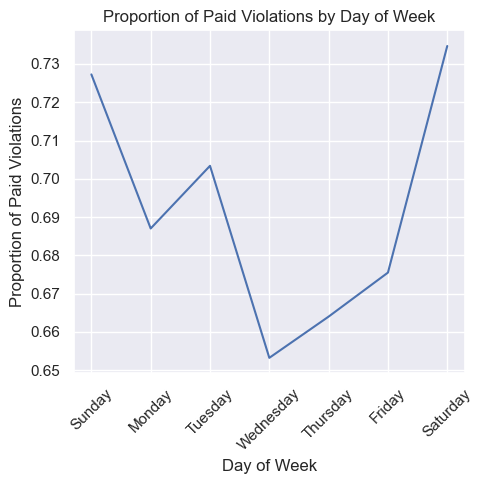

In [262]:
plt.figure(figsize= (5, 5))
sns.set_theme('notebook')

sns.lineplot(data= complianceByDay, x= 'day_of_week', y= 'paid')
plt.title('Proportion of Paid Violations by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Proportion of Paid Violations')
plt.xticks(rotation= 45)

plt.tight_layout()
plt.show()

Insights:
> - It appears that complaince rate decreases significantly during the weekdays of Monday to Thursday and then increases during Friday, Saturday, and Sunday.
> - A reason for this could be that many people cannot pay for their violations during the week while they are at work or at school.
> - So, they wait until the weekend to pay, which may explain the reason for the spike in compliance.
> - Overall, there does seem to exist a difference in compliance bwteen week days and weekends.

In [263]:
violationsWeekend = complianceByDay.loc[complianceByDay['day_of_week_Number'].isin([1, 7]), :].sort_values('day_of_week')
violationsWeekend

,day_of_week_Number,day_of_week,paid
6,7,Saturday,0.734694
0,1,Sunday,0.727273


In [264]:
violationsWeekday = complianceByDay.loc[complianceByDay['day_of_week_Number'].isin([2, 3, 4, 5, 6]), :]
violationsWeekday

,day_of_week_Number,day_of_week,paid
1,2,Monday,0.687023
2,3,Tuesday,0.703390
3,4,Wednesday,0.653226
4,5,Thursday,0.664000
5,6,Friday,0.675497


> - We can analyze this difference further by splitting the weekend apart from the week days.
> - This is done by getting the day numbers. 1 and 7 are for saturday and sunday, while 2, 3, 4, 5, and 6 are for the weekdays monday through friday.

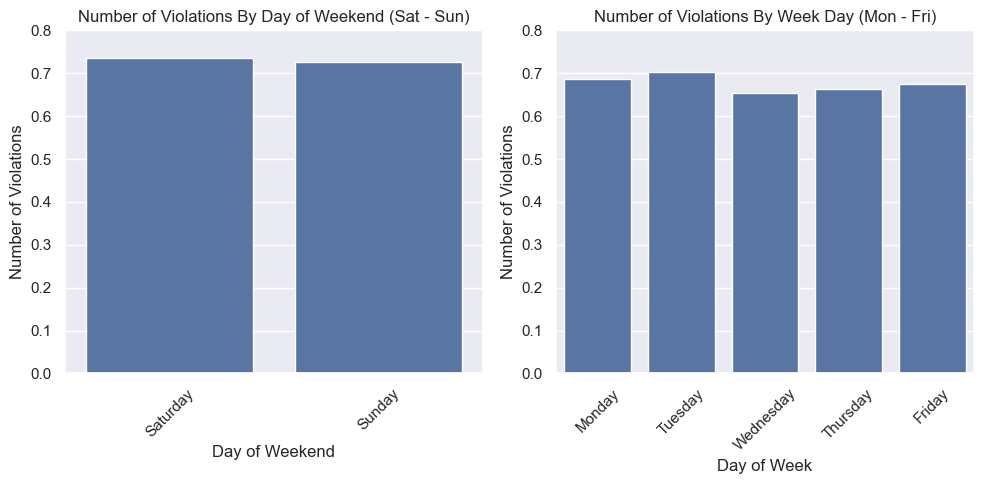

In [265]:
plt.figure(figsize= (10, 5))
sns.set_theme('notebook')

plt.subplot(1, 2, 1)
sns.barplot(data= violationsWeekend, x= 'day_of_week', y= 'paid')
plt.title('Number of Violations By Day of Weekend (Sat - Sun)')
plt.xlabel('Day of Weekend')
plt.ylabel('Number of Violations')
plt.xticks(rotation= 45)
plt.ylim(0, 0.8)

plt.subplot(1, 2, 2)
sns.barplot(data= violationsWeekday, x= 'day_of_week', y= 'paid')
plt.title('Number of Violations By Week Day (Mon - Fri)')
plt.xlabel('Day of Week')
plt.ylabel('Number of Violations')
plt.xticks(rotation= 45)
plt.ylim(0, 0.8)

plt.tight_layout()
plt.show()

Insights:
> - As seen in the chart above, we can conclude that compliance in paying for parking violations committed is higher during the weekend and lower on week days.